In [30]:
import pandas as pd
import cv2
from typing import List
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('annotation.csv', delimiter=',', usecols = (0, 2), names = ('AbsPath', 'Name'))

In [32]:
df

,AbsPath,Name
0,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat
1,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat
2,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat
3,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat
4,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat
...,...,...
2385,C:\Users\RobotComp.ru\Desktop\Lab\dataset\dog\...,dog
2386,C:\Users\RobotComp.ru\Desktop\Lab\dataset\dog\...,dog
2387,C:\Users\RobotComp.ru\Desktop\Lab\dataset\dog\...,dog
2388,C:\Users\RobotComp.ru\Desktop\Lab\dataset\dog\...,dog


Задание 1,2

In [33]:
df['Class'] = df['Name'].apply(lambda name: 0 if name == 'cat' else 1)

In [34]:
df

,AbsPath,Name,Class
0,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0
1,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0
2,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0
3,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0
4,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0
...,...,...,...
2385,C:\Users\RobotComp.ru\Desktop\Lab\dataset\dog\...,dog,1
2386,C:\Users\RobotComp.ru\Desktop\Lab\dataset\dog\...,dog,1
2387,C:\Users\RobotComp.ru\Desktop\Lab\dataset\dog\...,dog,1
2388,C:\Users\RobotComp.ru\Desktop\Lab\dataset\dog\...,dog,1


Задание 3

In [35]:
df['Height'] = df['AbsPath'].apply(lambda path: cv2.imread(path).shape[0])

In [36]:
df['Width'] = df['AbsPath'].apply(lambda path: cv2.imread(path).shape[1])

In [37]:
df['Depth'] = df['AbsPath'].apply(lambda path: cv2.imread(path).shape[2])

In [38]:
df

,AbsPath,Name,Class,Height,Width,Depth
0,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,320,427,3
1,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,320,444,3
2,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,320,480,3
3,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,300,480,3
4,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,300,480,3
...,...,...,...,...,...,...
2385,C:\Users\RobotComp.ru\Desktop\Lab\dataset\dog\...,dog,1,300,480,3
2386,C:\Users\RobotComp.ru\Desktop\Lab\dataset\dog\...,dog,1,320,480,3
2387,C:\Users\RobotComp.ru\Desktop\Lab\dataset\dog\...,dog,1,320,480,3
2388,C:\Users\RobotComp.ru\Desktop\Lab\dataset\dog\...,dog,1,312,480,3


Задание 4

In [39]:
df.describe()

,Class,Height,Width,Depth
count,2390.000000,2390.000000,2390.000000,2390.0
mean,0.499582,310.106695,461.138494,3.0
std,0.500104,15.692549,42.122701,0.0
min,0.000000,247.000000,160.000000,3.0
25%,0.000000,300.000000,469.000000,3.0
50%,0.000000,320.000000,480.000000,3.0
75%,1.000000,320.000000,480.000000,3.0
max,1.000000,320.000000,480.000000,3.0


In [40]:
df['Class'].describe().value_counts()

Class
0.000000       3
1.000000       2
2390.000000    1
0.499582       1
0.500104       1
Name: count, dtype: int64

Задание 5 #сбалансированный набор данных

In [41]:
def filter_df(df: pd.DataFrame, class_name: int) -> pd.DataFrame:
    """
    Данная функция возвращает датафрейм, состоящий из строк, для которых значение метки соответствует заданному
    """
    new_df = df[df['Class'] == class_name]
    return new_df

In [42]:
df_0 = filter_df(df, 0) 
df_1 = filter_df(df, 1)

In [43]:
df_0

,AbsPath,Name,Class,Height,Width,Depth
0,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,320,427,3
1,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,320,444,3
2,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,320,480,3
3,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,300,480,3
4,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,300,480,3
...,...,...,...,...,...,...
1191,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,320,480,3
1192,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,317,480,3
1193,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,320,427,3
1194,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,300,480,3


Задание 6

In [44]:
def filter_df_max(df: pd.DataFrame, class_name: int, max_height: int, max_width: int) -> pd.DataFrame:
    """
    Данная функция возвращает датафрейм, для которого размеры удовлетворяют следующему условию: 
    height <= max_height and width <= max_width, а метка класса соответствует указанной.
    """
    new_df = df[(df['Class'] == class_name) & (df['Height'] <= max_height) & (df['Width'] <= max_width)]
    return new_df

In [55]:
df_0_filter = filter_df_max(df, 0, df['Height'].max(), df['Width'].max())
df_1_filter = filter_df_max(df, 1, df['Height'].max()-5, df['Width'].max()-5)

In [56]:
df_0_filter

,AbsPath,Name,Class,Height,Width,Depth,Pixels
0,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,320,427,3,409920
1,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,320,444,3,426240
2,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,320,480,3,460800
3,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,300,480,3,432000
4,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,300,480,3,432000
...,...,...,...,...,...,...,...
1191,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,320,480,3,460800
1192,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,317,480,3,456480
1193,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,320,427,3,409920
1194,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,300,480,3,432000


Задание 7

In [47]:
df['Pixels'] = df['Height'] * df['Width'] * df['Depth']
df

,AbsPath,Name,Class,Height,Width,Depth,Pixels
0,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,320,427,3,409920
1,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,320,444,3,426240
2,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,320,480,3,460800
3,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,300,480,3,432000
4,C:\Users\RobotComp.ru\Desktop\Lab\dataset\cat\...,cat,0,300,480,3,432000
...,...,...,...,...,...,...,...
2385,C:\Users\RobotComp.ru\Desktop\Lab\dataset\dog\...,dog,1,300,480,3,432000
2386,C:\Users\RobotComp.ru\Desktop\Lab\dataset\dog\...,dog,1,320,480,3,460800
2387,C:\Users\RobotComp.ru\Desktop\Lab\dataset\dog\...,dog,1,320,480,3,460800
2388,C:\Users\RobotComp.ru\Desktop\Lab\dataset\dog\...,dog,1,312,480,3,449280


In [48]:
grouped = df.groupby('Class').agg({'Pixels': ['max', 'min', 'mean']})
grouped

Pixels                       
          max     min           mean
Class                               
0      460800  153600  427901.939799
1      460800  204480  428992.160804

Задание 8

In [49]:
def get_hists(df: pd.DataFrame, class_name: int) -> List[np.ndarray]:
    """
    Возвращает 3 массива значений гистограммы по каждому каналу(b, g, r)
    """
    class_df = filter_df(df, class_name)
    img = cv2.imread(class_df['AbsPath'].sample().values[0])
    hists = []
    for i in range(3):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        hists.append(hist)
    return hists

Задание 9

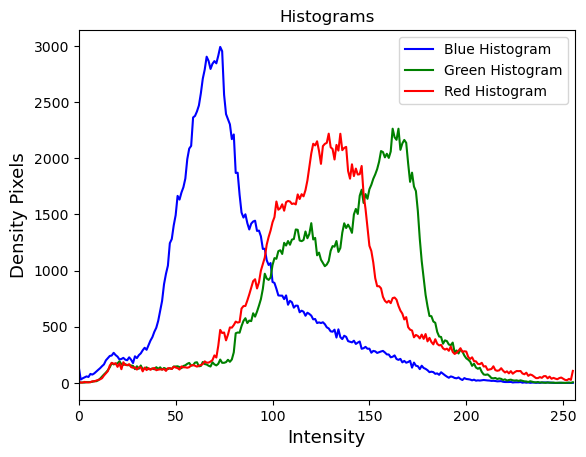

In [59]:
hists = get_hists(df, 1)
colors = ["Blue", "Green", "Red"]

for i in range(len(hists)):
    plt.plot(hists[i], color=colors[i], label=f"{colors[i]} Histogram")
    plt.xlim([0, 256])

plt.title("Histograms")
plt.xlabel('Intensity', fontsize = 13)
plt.ylabel('Density Pixels', fontsize = 13)
plt.legend()
plt.show()

Задание 10